# Imports

In [9]:
from torch.utils.data import DataLoader, random_split
import torch
import numpy as np
from data import ParenthesizationDataset, ParenthesizationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Initialization
Set the parameters here for training and initialize the train/test datasets, data loaders, model, loss function and optimizer.

In [2]:
n = 7
epochs = 50
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 32

# TODO: Create the datasets, model, loss function, optimizer, and data loader.
dataset = ParenthesizationDataset(n)
train_size = int(train_split * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model = ParenthesizationModel(n)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Training the model
* Call `train_one_epoch` repeatedly to train the model once over the entire training dataset.
* Print out the epoch number and loss after each training call to verify that the loss is going down.
* Record the loss values in a list so that it can be plotted in the cell below.
* After training, call `evaluate_model` to get the confusion matrix.
* Save the model as `models/linear_model_{n}.pt`.

In [3]:
# * Call `train_one_epoch` repeatedly to train the model once over the entire training dataset.
# * Print out the epoch number and loss after each training call to verify that the loss is going down.
# * Record the loss values in a list so that it can be plotted in the cell below.
# * After training, call `evaluate_model` to get the confusion matrix.
# * Save the model as `models/linear_model_{n}.pt`.

loss = []
for epoch in range(epochs):
    # TODO
    train_loss = train_one_epoch(train_loader, model, loss_fn, optimizer)
    loss.append(train_loss)
    print(f"Epoch {epoch}: {train_loss}")

conf_matrix = evaluate_model(model, test_dataset)
print("Confusion Matrix:")
print(conf_matrix)
torch.save(model.state_dict(), f"models/linear_model{n}.pt")

Epoch 0: 0.8862006528811022
Epoch 1: 0.7810656916011464
Epoch 2: 0.7250453694300218
Epoch 3: 0.6842946491458199
Epoch 4: 0.6522424600341103
Epoch 5: 0.621266944841905
Epoch 6: 0.5910024399107153
Epoch 7: 0.5654625526883386
Epoch 8: 0.5455670018087734
Epoch 9: 0.5270347906784578
Epoch 10: 0.5095624463124708
Epoch 11: 0.490579064596783
Epoch 12: 0.4780134138735858
Epoch 13: 0.46087025512348523
Epoch 14: 0.4539929655465213
Epoch 15: 0.44410732117566193
Epoch 16: 0.4362613301385533
Epoch 17: 0.4206184460358186
Epoch 18: 0.4142835478891026
Epoch 19: 0.4060851051048799
Epoch 20: 0.39979059452360327
Epoch 21: 0.39005737006664276
Epoch 22: 0.38216422633691266
Epoch 23: 0.3783147172494368
Epoch 24: 0.373882994055748
Epoch 25: 0.3673019382086667
Epoch 26: 0.3601086193864996
Epoch 27: 0.3575482829050584
Epoch 28: 0.3510238230228424
Epoch 29: 0.3491748950698159
Epoch 30: 0.3474561450156299
Epoch 31: 0.3383651917630976
Epoch 32: 0.3388686247847297
Epoch 33: 0.33415545319969003
Epoch 34: 0.330334177

# Plot the loss curve
Plot the loss curve with appropriate figure title and axis labels. Save the resulting figure in `figures/loss_curve_{n}.png`.

Loss plot saved to figures/loss_plot_7.png


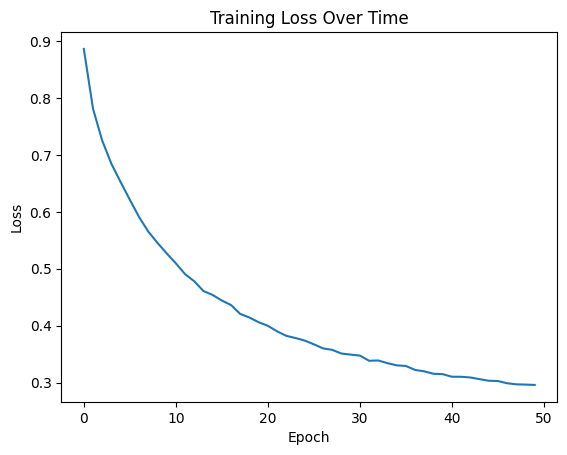

In [8]:
# TODO
plt.figure()
plt.plot(range(epochs), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plot_path = f"figures/loss_plot_{n}.png"
plt.savefig(plot_path)
print(f"Loss plot saved to {plot_path}")
plt.show()

# Analyze accuracy using the confusion matrix
- Print out the accuracy within each of the prediction classes.
- Print out the size of each prediction class.
- Print out the overall accuracy.

In [12]:
# TODO
total = sum(sum(row) for row in conf_matrix)
true_neg, false_pos, false_neg, true_pos = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print(f"True Neg Accuracy: {true_neg / (true_neg + false_pos)}")
print(f"True Pos Accuracy: {true_pos / (true_pos + false_neg)}")
print(f"Negative Class: {true_neg + false_pos}")
print(f"Positive Class: {false_neg + true_pos}")
print(f"Accuracy: {(true_neg + true_pos) / total}")

True Negative Accuracy: 0.8314606741573034
True Positive Accuracy: 1.0
Negative Class: 89
Positive Class: 83
Accuracy: 0.9127906976744186


# Plot the model weights
Can you interpret what the model is doing? Plot the model weights using `plt.imshow()` to get a heatmap. Choose a colormap from https://matplotlib.org/stable/users/explain/colors/colormaps.html that you prefer. I default to the `bwr` colormap where negative values are blue, positive value are red, and values close to zero are white.

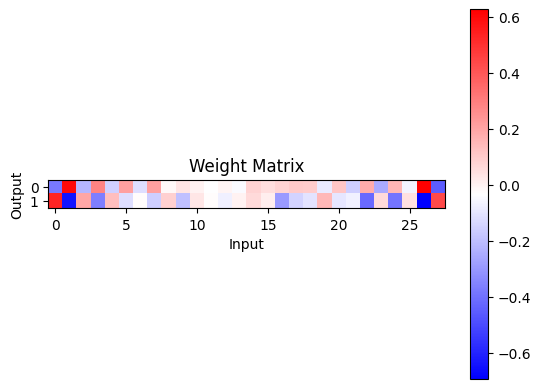

In [13]:
# TODO
weights = model.fc.weight.detach().numpy()
plt.figure()
plt.imshow(weights, cmap="bwr")
plt.colorbar()
plt.title("Weight Matrix")
plt.xlabel("Input")
plt.ylabel("Output")
plot_path = f"figures/weight_matrix_{n}.png"
plt.savefig(plot_path)
plt.show()

# "Translate" the model into code.
Implement `simple_evaluate` which condenses the model's "logic" into a single if-else statement. Run this evaluation function over the test set to produce a new confusion matrix and see how it performs compared to the model you train.

In [16]:
# Try to condense the linear model down into a single if-else statement. 
def simple_evaluate(input):
    # TODO
    if input[0] == 1:
        return 1
    return 0

# Test the simple model on the test dataset. create confusion matrix
#produce a new confusion matrix and see how it performs compared to the model you train.
conf_matrix = np.zeros((2, 2))
for i in range(len(test_dataset)):
    input, target = test_dataset[i]
    prediction = simple_evaluate(input)
    conf_matrix[target][prediction] += 1
print("Simple Model Confusion Matrix:")
print(conf_matrix)
#compute the accuracy of the simple model
total = sum(sum(row) for row in conf_matrix)
true_neg, false_pos, false_neg, true_pos = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print(f"True Neg Accuracy: {true_neg / (true_neg + false_pos)}")
print(f"True Pos Accuracy: {true_pos / (true_pos + false_neg)}")
print(f"Negative Class: {true_neg + false_pos}")
print(f"Positive Class: {false_neg + true_pos}")
print(f"Accuracy: {(true_neg + true_pos) / total}")


Simple Model Confusion Matrix:
[[50. 39.]
 [ 0. 83.]]
True Neg Accuracy: 0.5617977528089888
True Pos Accuracy: 1.0
Negative Class: 89.0
Positive Class: 83.0
Accuracy: 0.7732558139534884
